In [1]:
import pandas as pd
import numpy as np 
import os
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px


In [50]:
file=r"D:\5.DataAnalysis\2\Project 6..Weather Data\1. Weather Data.csv"
weather_df=pd.read_csv(file)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
weather_df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [51]:
#Change the data types of the data column
weather_df['Date/Time']=pd.to_datetime(weather_df['Date/Time'] , format='%m/%d/%Y %H:%M' )

In [5]:
weather_df.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

In [6]:
weather_df.shape

(8784, 8)

In [7]:
weather_df.isnull().sum()


Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [10]:
weather_df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [52]:
weather_df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

## 1- Find the number of times when the wetaher was exactly clear

In [14]:
weather_df['Weather'].value_counts()['Clear']

1326

In [15]:
weather_df.groupby('Weather').get_group('Clear')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear


## 2- find all instance where 'Snow ' was recoreded


In [53]:
weather_df.groupby('Weather').get_group('Snow')
weather_df['Weather'].value_counts()['Snow']

390

In [25]:
weather_df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [26]:
weather_df[weather_df['Weather'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


## 3- Find all instance where wind speed is above 24 and visiblity is 25 

In [54]:
weather_df[(weather_df['Wind Speed_km/h']>24) & (weather_df['Visibility_km'] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,2012-12-28 17:00:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,2012-12-30 17:00:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,2012-12-30 19:00:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,2012-12-30 23:00:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


## 4- Mean value of each col against each weather condition , then find the minimum, and max values and merge it in one df


In [58]:
w_mean =weather_df.groupby('Weather').mean()
w_mean

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [59]:
w_min=weather_df.groupby('Weather').min()
w_min

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,2012-01-03 19:00:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,2012-01-01 17:00:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,2012-01-23 21:00:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",2012-01-23 20:00:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-17 15:00:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",2012-12-18 21:00:00,0.3,-0.1,92,7,2.4,97.79
Fog,2012-01-01 00:00:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,2012-01-07 11:00:00,-9.0,-12.2,78,6,4.8,98.44


In [60]:
w_max= weather_df.groupby('Weather').max()
w_max

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,2012-12-30 20:00:00,32.8,20.4,99,33,48.3,103.63
Cloudy,2012-12-31 06:00:00,30.5,22.6,99,54,48.3,103.65
Drizzle,2012-12-22 01:00:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",2012-12-19 10:00:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-19 18:00:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",2012-12-22 03:00:00,1.1,0.6,98,32,9.7,100.15
Fog,2012-12-29 10:00:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2012-12-17 00:00:00,-2.3,-3.3,93,26,12.9,101.02


## 5- Show all records where weather condioton is Fog 

In [63]:
weather_df[weather_df['Weather']=='Fog']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,2012-12-29 04:00:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,2012-12-29 05:00:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,2012-12-29 06:00:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog


## 6 -alayize the temp vs date and give insights about the distrbution

In [ ]:
px.scatter(x='Date/Time' , y='Temp_C', color='Temp_C' , data_frame=weather_df)

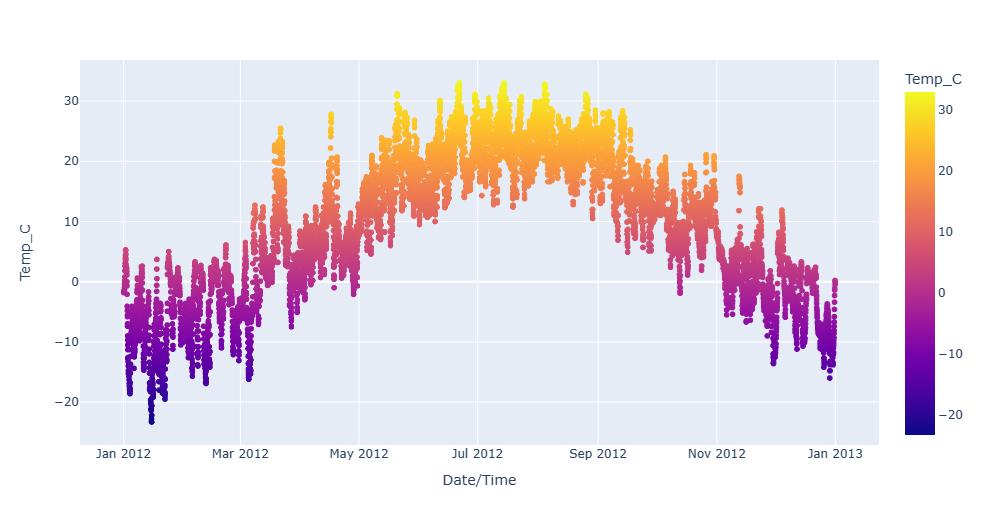

In [38]:
weather_df['month'] =weather_df['Date/Time'].dt.strftime('%B')

In [39]:
weather_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,month
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,January
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,January
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",January
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",January
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,January
...,...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,December
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,December
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,December
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,December


In [40]:
temp_month= weather_df.groupby('month').agg({'Temp_C' : ['min','mean','max']}).reset_index()
temp_month= weather_df.groupby('month').agg({'Temp_C' : ['min','mean','max']}).reset_index()
temp_month.columns = temp_month.columns.droplevel(level=0)
temp_month.rename(columns={"" :'month'} , inplace=True)
temp_month

,month,min,mean,max
0,April,-3.0,7.009306,27.8
1,August,10.5,22.279301,32.8
2,December,-16.0,-3.306317,11.9
3,February,-16.9,-4.225000,6.1
4,January,-23.3,-7.371505,5.3
5,July,12.4,22.790054,33.0
6,June,9.5,20.134028,33.0
7,March,-16.2,3.121237,25.5
8,May,4.6,16.237769,31.2
9,November,-13.6,0.931389,17.5


In [41]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
pd.Categorical(temp_month['month'], categories=month_order, ordered=True)
temp_month['month'] = pd.Categorical(temp_month['month'], categories=month_order, ordered=True)

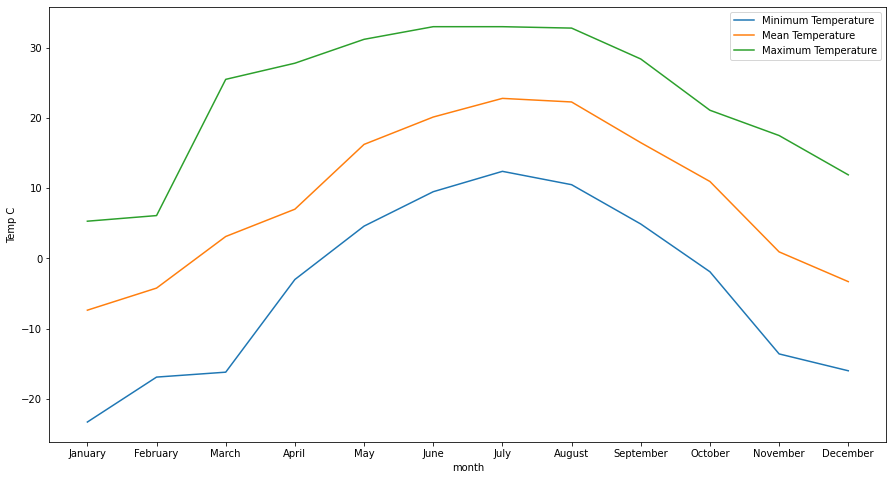

In [49]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month', y='min',  data=temp_month ,label='Minimum Temperature')
sns.lineplot(x='month', y='mean',  data=temp_month, label ='Mean Temperature')
sns.lineplot(x='month', y='max',  data=temp_month, label ='Maximum Temperature')
plt.ylabel('Temp C')
plt.legend()
plt.show()

In [34]:
px.box( y='Temp_C' , data_frame=weather_df)

In [35]:
data_wc = weather_df.groupby('Weather').size().reset_index(name='count')

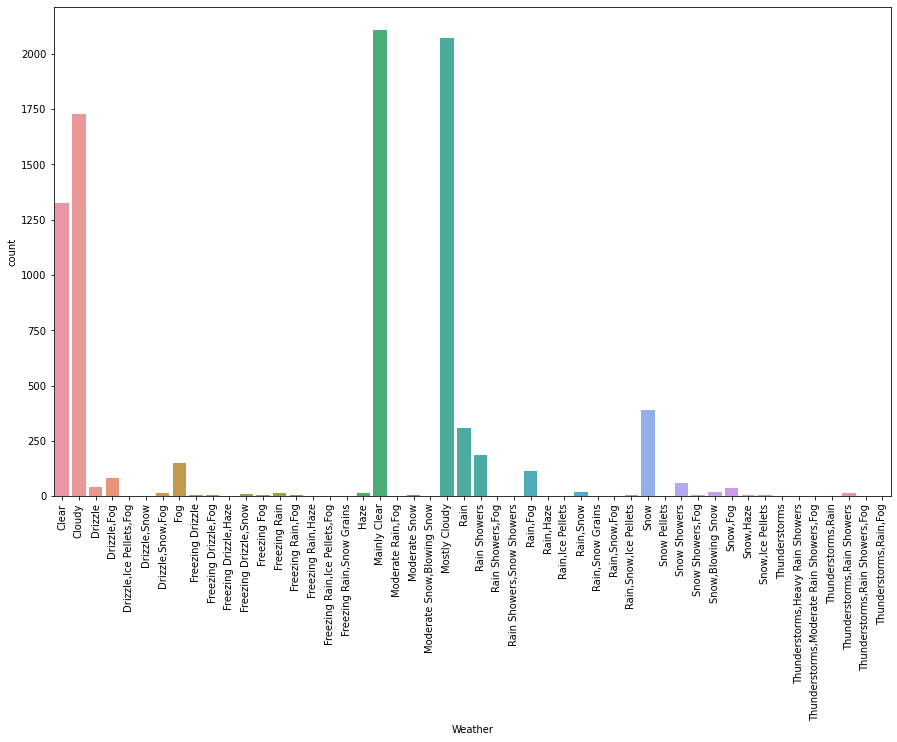

In [48]:
plt.figure(figsize=(15,9))
sns.barplot(x='Weather' , y='count' , data=data_wc)
plt.xticks(rotation=90)
plt.show()